# EXPLORATORY ANALYSIS
## TRIPADVISOR: HOTELS

*   Esteban Ariza
*   Johan Giraldo
*   Mateo Valdes

## Prerequisites

### Install python libraries

In [1]:
# %pip install pandas
# %pip install seaborn
# %pip install numpy
# %pip install regex
# %pip install matplotlib
# %pip install scipy
# %pip install PyEnchant

### Install exporter

In [2]:
# Windows
# !choco install pandoc
# !choco install miktex.install

#Linux
# %sudo apt-get install pandoc
# %sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# !pip3 install --upgrade pip
# !pip3 install jupyter
# %pip install nbconvert[webpdf]
# %export PATH=/Library/TeX/texbin:$PATH

### Import python libraries

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
import datetime

### Import data (CSV)

#### From Google Drive

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')
# HOTEL_DATA_PATH = '/content/drive/MyDrive/Estudio/9 Semestre/Inteligencia Artificial II/TripAdvisor/data.csv'
# HOTEL_DATA = pd.read_csv(HOTEL_DATA_PATH)

#### Local


In [5]:
HOTEL_DATA_PATH = '../data/web_scraping/outputs/tripadvisor_hotels_full_data.csv'
HOTEL_DATA = pd.read_csv(HOTEL_DATA_PATH)

## Data Review

In [6]:
HOTEL_DATA

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,REVIEW_RATING,REVIEW_DATE,REVIEW_TEXT
0,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,This hotel checked off every box we had when l...
1,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,We turned down a 2 day free 5-star hotel offer...
2,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: July 2022,Friendly people and great location. Shope and ...
3,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,Came here with my family and the location is p...
4,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,bubble_50,Date of stay: September 2022,"This hotel is wonderful,the best assest they h..."
...,...,...,...,...,...,...,...,...
93644,Pineta Park Deluxe Hotel,3 of 5 bubbles,Contact accommodation for availability,"Sirinyer Mah. Kenan Evren Bulv., Armutalan 487...",https://www.tripadvisor.com//Hotel_Review-g670...,bubble_20,Date of stay: August 2006,"We stayed at the hotel in august 2006, The hot..."
93645,Pineta Park Deluxe Hotel,3 of 5 bubbles,Contact accommodation for availability,"Sirinyer Mah. Kenan Evren Bulv., Armutalan 487...",https://www.tripadvisor.com//Hotel_Review-g670...,bubble_50,Date of stay: July 2006,Just returned from two fantastic weeks at the ...
93646,Pineta Park Deluxe Hotel,3 of 5 bubbles,Contact accommodation for availability,"Sirinyer Mah. Kenan Evren Bulv., Armutalan 487...",https://www.tripadvisor.com//Hotel_Review-g670...,bubble_50,Date of stay: June 2006,Me and my friend have just returned from Marma...
93647,Pineta Park Deluxe Hotel,3 of 5 bubbles,Contact accommodation for availability,"Sirinyer Mah. Kenan Evren Bulv., Armutalan 487...",https://www.tripadvisor.com//Hotel_Review-g670...,bubble_50,Date of stay: July 2006,well my friend and i went for a week away in t...


In [7]:
HOTEL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93649 entries, 0 to 93648
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HOTEL_NAME         93649 non-null  object
 1   HOTEL_RATING       93649 non-null  object
 2   HOTEL_PRICE        93649 non-null  object
 3   HOTEL_LOCATION     93649 non-null  object
 4   HOTEL_REVIEW_LINK  93649 non-null  object
 5   REVIEW_RATING      93649 non-null  object
 6   REVIEW_DATE        93649 non-null  object
 7   REVIEW_TEXT        93649 non-null  object
dtypes: object(8)
memory usage: 5.7+ MB


The csv have 8 columns and non of them contain null values. There are some adjustments we should do to each column:
* **HOTEL_NAME:** The first number should be eliminated from the name.
* **HOTEL_RATING:** The rating must be a integer number from 1 to 5.
* **HOTEL_PRICE:** The currency must be removed and the price should be numeric.
* **REVIEW_RATING:** The same as the "HOTEL_RATING"
* **REVIEW_DATE:** The phrase "Date of stay:" should be removed.



In [8]:
GENERAL_HOTEL_DATA = HOTEL_DATA.groupby(["HOTEL_NAME", "HOTEL_RATING","HOTEL_PRICE","HOTEL_LOCATION","HOTEL_REVIEW_LINK"]).size().reset_index(name='HOTEL_REVIEW_COUNT') # COUNT
GENERAL_HOTEL_DATA

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,HOTEL_REVIEW_COUNT
0,1. Romance Istanbul Hotel,5 of 5 bubbles,"COP 1,100,014","Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,2000
1,10. Hotel Le Milie Rose,5 of 5 bubbles,"COP 1,306,211","22 rue des Petites Ecuries, 75010 Paris France",https://www.tripadvisor.com//Hotel_Review-g187...,212
2,11. Helios Costa Tropical,4.5 of 5 bubbles,"COP 286,729","Paseo de San Cristobal 12, 18690, Almunecar Spain",https://www.tripadvisor.com//Hotel_Review-g608...,506
3,12. Turin Palace Hotel,5 of 5 bubbles,"COP 971,693","Via Paolo Sacchi 8, 10128 Turin Italy",https://www.tripadvisor.com//Hotel_Review-g187...,1116
4,13. Ambassade Hotel,5 of 5 bubbles,"COP 1,507,725","Herengracht 341, 1016 AZ Amsterdam The Netherl...",https://www.tripadvisor.com//Hotel_Review-g188...,1990
...,...,...,...,...,...,...
56,The Manhattan at Times Square Hotel,3.5 of 5 bubbles,"COP 797,238","790 7th Avenue, New York City, NY 10019-6204",https://www.tripadvisor.com//Hotel_Review-g607...,1990
57,Tia Heights Makadi Bay,3.5 of 5 bubbles,Contact accommodation for availability,"Safaga Road, Makadi Bay, Hurghada 84515 Egypt",https://www.tripadvisor.com//Hotel_Review-g297...,1283
58,Travelodge London Central Aldgate East,3 of 5 bubbles,"COP 609,646","6-13 Chamber Street, London E1 8BL England",https://www.tripadvisor.com//Hotel_Review-g186...,1196
59,Travelodge London Kings Cross Royal Scot,3 of 5 bubbles,"COP 492,147","100 King's Cross Road, London WC1X 9DT England",https://www.tripadvisor.com//Hotel_Review-g186...,1990


## Data Cleaning



### Common use cleaning functions

In [9]:
def clean_int(column, pattern):
    return column.replace(pattern, '', regex = True).astype(np.int64)

def clean_string(column, pattern):
    return column.replace(pattern, '', regex = True)

HOTEL_DATA = HOTEL_DATA.dropna()

### HOTEL_NAME

In [10]:
def clean_hotel_name_map(value):
  vals = value.split('.')
  try:
    int(vals[0]) #the first one must be a number
    value = '.'.join(vals[1:])
  finally:
    return value

def clean_hotel_name(data):
  return data['HOTEL_NAME'].map(clean_hotel_name_map)

HOTEL_DATA['HOTEL_NAME'] = clean_hotel_name(HOTEL_DATA)

### HOTEL_RATING

In [11]:
def clean_hotel_rating(data):
  return data['HOTEL_RATING'].str[0].astype(np.int64)

HOTEL_DATA['HOTEL_RATING'] = clean_hotel_rating(HOTEL_DATA)

### HOTEL_PRICE

In [12]:
CURRENCY = 'COP'

def clean_hotel_price_map(value):
  value = value.replace(CURRENCY, '')
  value = value.replace(',','')
  try:
    value = float(value)
  except:
    value = 0;
  finally:
    return value

def clean_hotel_price(data):
  return data['HOTEL_PRICE'].map(clean_hotel_price_map)

HOTEL_DATA['HOTEL_PRICE'] = clean_hotel_price(HOTEL_DATA)

### REVIEW_RATING

In [13]:
def clean_review_rating(data):
  return (clean_int(data['REVIEW_RATING'],'[bubble_.]') / 10).astype(np.int64)

HOTEL_DATA['REVIEW_RATING'] =  clean_review_rating(HOTEL_DATA)

### REVIEW_DATE

In [14]:
def parseDate(strDate):
  strMonth, strYear = strDate.split(' ')
  strYear = int(strYear)
  strMonth = datetime.datetime.strptime(strMonth[0:3],'%b').month
  date = pd.Timestamp(year=strYear, month=strMonth, day=1)
  return date

def clean_review_date(data):
  column = data['REVIEW_DATE'].str[14:]
  column = column.map(parseDate)
  return column

HOTEL_DATA['REVIEW_DATE'] = clean_review_date(HOTEL_DATA)

## Data Analysis

### GENERAL

In [15]:
HOTEL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93649 entries, 0 to 93648
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   HOTEL_NAME         93649 non-null  object        
 1   HOTEL_RATING       93649 non-null  int64         
 2   HOTEL_PRICE        93649 non-null  float64       
 3   HOTEL_LOCATION     93649 non-null  object        
 4   HOTEL_REVIEW_LINK  93649 non-null  object        
 5   REVIEW_RATING      93649 non-null  int64         
 6   REVIEW_DATE        93649 non-null  datetime64[ns]
 7   REVIEW_TEXT        93649 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.4+ MB


In [16]:
HOTEL_DATA.describe()

,HOTEL_RATING,HOTEL_PRICE,REVIEW_RATING
count,93649.000000,9.364900e+04,93649.000000
mean,3.701235,9.467994e+05,3.717178
std,1.155310,1.232711e+06,1.573540
min,2.000000,0.000000e+00,1.000000
25%,3.000000,1.729870e+05,2.000000
50%,4.000000,7.050660e+05,5.000000
75%,5.000000,1.274352e+06,5.000000
max,5.000000,7.695796e+06,5.000000


### REVIEWS

In [17]:
# DF - REVIEW LENGTH (Add new col REVIEW TEXT LENGTH)
REVIEW_LENGTH_HOTEL_DATA = HOTEL_DATA.copy()
REVIEW_LENGTH_HOTEL_DATA["REVIEW_TEXT_LENGTH"] = REVIEW_LENGTH_HOTEL_DATA["REVIEW_TEXT"].map(len)

#### REVIEW_RATING

In [18]:
REVIEW_LENGTH_HOTEL_DATA.sort_values(by = ['REVIEW_RATING'], ascending = False)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,REVIEW_RATING,REVIEW_DATE,REVIEW_TEXT,REVIEW_TEXT_LENGTH
0,Romance Istanbul Hotel,5,1100014.0,"Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,5,2022-09-01,This hotel checked off every box we had when l...,1365
34988,Boutique Hotel am Stephansplatz,5,1370004.0,"Stephansplatz 9 1010 Vienna, Vienna 1010 Austria",https://www.tripadvisor.com//Hotel_Review-g190...,5,2018-12-01,We like to visit Vienna in early December to s...,689
34992,Boutique Hotel am Stephansplatz,5,1370004.0,"Stephansplatz 9 1010 Vienna, Vienna 1010 Austria",https://www.tripadvisor.com//Hotel_Review-g190...,5,2018-11-01,We had a spacious room overlooking St. Stephan...,345
34993,Boutique Hotel am Stephansplatz,5,1370004.0,"Stephansplatz 9 1010 Vienna, Vienna 1010 Austria",https://www.tripadvisor.com//Hotel_Review-g190...,5,2018-12-01,"Clean, friendly and perfectly located hotel. T...",252
34995,Boutique Hotel am Stephansplatz,5,1370004.0,"Stephansplatz 9 1010 Vienna, Vienna 1010 Austria",https://www.tripadvisor.com//Hotel_Review-g190...,5,2018-11-01,The trip was a week for my partner's birthday ...,532
...,...,...,...,...,...,...,...,...,...
71135,Britannia Sachas Hotel,2,164656.0,"12 Tib Street Piccadilly, Manchester M4 1SH En...",https://www.tripadvisor.com//Hotel_Review-g187...,1,2013-08-01,Just back yesterday from the Sachas/Shambles w...,789
49015,Rio All-Suite Hotel & Casino,3,128508.0,"3700 W. Flamingo Rd, Las Vegas, NV 89103",https://www.tripadvisor.com//Hotel_Review-g459...,1,2021-07-01,I booked this hotel because the website displa...,788
49014,Rio All-Suite Hotel & Casino,3,128508.0,"3700 W. Flamingo Rd, Las Vegas, NV 89103",https://www.tripadvisor.com//Hotel_Review-g459...,1,2021-06-01,Penn and Teller put on a great show. Go see it...,788
49013,Rio All-Suite Hotel & Casino,3,128508.0,"3700 W. Flamingo Rd, Las Vegas, NV 89103",https://www.tripadvisor.com//Hotel_Review-g459...,1,2021-07-01,This was a long waited family trip. Due to the...,368


#### REVIEW_TEXT

In [19]:
REVIEW_LENGTH_HOTEL_DATA.sort_values(by = ['REVIEW_TEXT_LENGTH'], ascending = False)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,REVIEW_RATING,REVIEW_DATE,REVIEW_TEXT,REVIEW_TEXT_LENGTH
19973,Atrium Platinum Luxury Resort Hotel & Spa,5,1435751.0,"Illiados Street, Ixia Bay, Rhodes Town 851 00 ...",https://www.tripadvisor.com//Hotel_Review-g635...,3,2022-07-01,Apon our arrival we were greeted by the porter...,9750
19966,Atrium Platinum Luxury Resort Hotel & Spa,5,1435751.0,"Illiados Street, Ixia Bay, Rhodes Town 851 00 ...",https://www.tripadvisor.com//Hotel_Review-g635...,5,2022-08-01,We spent two weeks all inclusive as a family o...,4192
91819,Pineta Park Deluxe Hotel,3,0.0,"Sirinyer Mah. Kenan Evren Bulv., Armutalan 487...",https://www.tripadvisor.com//Hotel_Review-g670...,1,2022-08-01,"Booked 2 weeks here for my 12yr old son and I,...",3302
87599,Europa Gatwick Hotel,2,289912.0,"Balcombe Road, Crawley RH10 7ZR England",https://www.tripadvisor.com//Hotel_Review-g187...,1,2022-08-01,We arrived at the hotel later than expected at...,3152
91822,Pineta Park Deluxe Hotel,3,0.0,"Sirinyer Mah. Kenan Evren Bulv., Armutalan 487...",https://www.tripadvisor.com//Hotel_Review-g670...,1,2022-08-01,I am writing this regarding the experience wit...,3131
...,...,...,...,...,...,...,...,...,...
78403,Travelodge by Wyndham San Francisco Central,2,398775.0,"1707 Market St, San Francisco, CA 94103-1218",https://www.tripadvisor.com//Hotel_Review-g607...,5,2012-02-01,I was surprised the suite was nice and so chea...,58
86975,Britannia Edinburgh Hotel,2,0.0,"69 Belford Road, Edinburgh EH4 3DW Scotland",https://www.tripadvisor.com//Hotel_Review-g186...,2,2010-08-01,For this price I expect more than sub Ibis exp...,57
28789,Hotel Regent's Garden - Astotel,4,1099129.0,"6 rue Pierre Demours, 75017 Paris France",https://www.tripadvisor.com//Hotel_Review-g187...,5,2011-06-01,"Great room, good location, excellent staff & g...",57
84250,Club Pineta Hotel,2,0.0,"Armutalan Mahallesi, Fatih Sultan Mehmet Cd., ...",https://www.tripadvisor.com//Hotel_Review-g298...,1,2011-05-01,Worst hotel on earth health haazard should clo...,53


#### REVIEW DATE

In [20]:
REVIEW_LENGTH_HOTEL_DATA.sort_values(by = ['REVIEW_DATE'], ascending = False)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,REVIEW_RATING,REVIEW_DATE,REVIEW_TEXT,REVIEW_TEXT_LENGTH
0,Romance Istanbul Hotel,5,1100014.0,"Hudavendigar Cd. No:5 Sirkeci, Istanbul 34110 ...",https://www.tripadvisor.com//Hotel_Review-g293...,5,2022-09-01,This hotel checked off every box we had when l...,1365
57604,Flamingo Las Vegas Hotel & Casino,3,482301.0,"3555 Las Vegas Blvd S, Las Vegas, NV 89109-8901",https://www.tripadvisor.com//Hotel_Review-g459...,2,2022-09-01,Arrived in the dark after a long flight and fa...,473
57595,Flamingo Las Vegas Hotel & Casino,3,482301.0,"3555 Las Vegas Blvd S, Las Vegas, NV 89109-8901",https://www.tripadvisor.com//Hotel_Review-g459...,4,2022-09-01,"The room was clean, updated and had a great ai...",317
57596,Flamingo Las Vegas Hotel & Casino,3,482301.0,"3555 Las Vegas Blvd S, Las Vegas, NV 89109-8901",https://www.tripadvisor.com//Hotel_Review-g459...,2,2022-09-01,I spent 3 days in this hotel and at least four...,260
57597,Flamingo Las Vegas Hotel & Casino,3,482301.0,"3555 Las Vegas Blvd S, Las Vegas, NV 89109-8901",https://www.tripadvisor.com//Hotel_Review-g459...,1,2022-09-01,"Bad, Bad and Horrendous treatment towards Disa...",379
...,...,...,...,...,...,...,...,...,...
83019,Tia Heights Makadi Bay,3,0.0,"Safaga Road, Makadi Bay, Hurghada 84515 Egypt",https://www.tripadvisor.com//Hotel_Review-g297...,3,2004-10-01,Makadi Bay 7th October - 14th October 2004 W...,788
82981,Tia Heights Makadi Bay,3,0.0,"Safaga Road, Makadi Bay, Hurghada 84515 Egypt",https://www.tripadvisor.com//Hotel_Review-g297...,3,2004-09-01,We stay at this hotel in September 2004 for 1 ...,785
36526,Boutique Hotel am Stephansplatz,5,1370004.0,"Stephansplatz 9 1010 Vienna, Vienna 1010 Austria",https://www.tripadvisor.com//Hotel_Review-g190...,4,2003-07-01,Driving back to Sweden from my fathers funeral...,777
93545,Pineta Park Deluxe Hotel,3,0.0,"Sirinyer Mah. Kenan Evren Bulv., Armutalan 487...",https://www.tripadvisor.com//Hotel_Review-g670...,2,2003-06-01,"its not the worst place ive stayed, definate r...",89


### HOTELS

In [21]:
# DF - GENERAL HOTEL DATA (The hotel cols)
GENERAL_HOTEL_DATA = HOTEL_DATA.groupby(["HOTEL_NAME", "HOTEL_RATING","HOTEL_PRICE","HOTEL_LOCATION","HOTEL_REVIEW_LINK"]).size().reset_index(name='HOTEL_REVIEW_COUNT') # COUNT
GENERAL_HOTEL_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HOTEL_NAME          60 non-null     object 
 1   HOTEL_RATING        60 non-null     int64  
 2   HOTEL_PRICE         60 non-null     float64
 3   HOTEL_LOCATION      60 non-null     object 
 4   HOTEL_REVIEW_LINK   60 non-null     object 
 5   HOTEL_REVIEW_COUNT  60 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.9+ KB


#### HOTEL_RATING

In [22]:
GENERAL_HOTEL_DATA.sort_values(by = ['HOTEL_RATING'], ascending = True)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,HOTEL_REVIEW_COUNT
59,Travelodge by Wyndham San Francisco Central,2,398775.0,"1707 Market St, San Francisco, CA 94103-1218",https://www.tripadvisor.com//Hotel_Review-g607...,1115
32,Britannia Hotel Birmingham,2,0.0,"New Street, Birmingham B2 4RX England",https://www.tripadvisor.com//Hotel_Review-g186...,1990
31,Britannia Edinburgh Hotel,2,0.0,"69 Belford Road, Edinburgh EH4 3DW Scotland",https://www.tripadvisor.com//Hotel_Review-g186...,1967
30,Adelphi Hotel,2,172987.0,"Ranelagh Place, Liverpool L3 5UL England",https://www.tripadvisor.com//Hotel_Review-g186...,2000
35,Club Pineta Hotel,2,0.0,"Armutalan Mahallesi, Fatih Sultan Mehmet Cd., ...",https://www.tripadvisor.com//Hotel_Review-g298...,1978
38,Europa Gatwick Hotel,2,289912.0,"Balcombe Road, Crawley RH10 7ZR England",https://www.tripadvisor.com//Hotel_Review-g187...,1997
42,Grand Burstin Hotel,2,164656.0,"The Harbour, Folkestone CT20 1TX England",https://www.tripadvisor.com//Hotel_Review-g190...,1988
43,Grand Hotel Scarborough,2,164656.0,"St. Nicholas Cliff, Scarborough YO11 2ET England",https://www.tripadvisor.com//Hotel_Review-g190...,1930
44,Grand Panorama Hotel,2,0.0,"Sinan Mah. 415. Sok. No:34, Armutalan 48700 Tu...",https://www.tripadvisor.com//Hotel_Review-g670...,601
33,Britannia Sachas Hotel,2,164656.0,"12 Tib Street Piccadilly, Manchester M4 1SH En...",https://www.tripadvisor.com//Hotel_Review-g187...,2000


#### HOTEL_PRICE

In [23]:
GENERAL_HOTEL_DATA.sort_values(by = ['HOTEL_PRICE'], ascending = False)

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,HOTEL_REVIEW_COUNT
5,Concorde De Luxe Resort,4,7695796.0,"Yasar Sobutay Bulvari, 44, Kemeragzi, Antalya ...",https://www.tripadvisor.com//Hotel_Review-g201...,1987
26,"Shangri-La The Shard, London",5,3894344.0,"31 St Thomas Street, London SE1 9QU England",https://www.tripadvisor.com//Hotel_Review-g186...,1990
22,La Maison Favart,5,1960113.0,"5, Rue de Marivaux 2nd Arr, 75002 Paris France",https://www.tripadvisor.com//Hotel_Review-g187...,1376
28,The Resident Covent Garden,5,1945067.0,"51 Bedford Street, London WC2R 0PZ England",https://www.tripadvisor.com//Hotel_Review-g186...,1104
20,Hotel Spadai,5,1903277.0,"Via Dei Martelli 10, 50129, Florence Italy",https://www.tripadvisor.com//Hotel_Review-g187...,1693
14,Hotel Da Baixa,5,1722665.0,"Rua da Prata 231, Lisbon 1100-417 Portugal",https://www.tripadvisor.com//Hotel_Review-g189...,520
17,Hotel Malte - Astotel,5,1648693.0,"63 rue de Richelieu, 75002 Paris France",https://www.tripadvisor.com//Hotel_Review-g187...,1121
8,Elysium Hotel,5,1571384.0,"Queen Verenikis Street PO Box 60701, Paphos 80...",https://www.tripadvisor.com//Hotel_Review-g190...,1950
12,Hotel Bradford Elysees - Astotel,5,1557099.0,"10, rue Saint Philippe du Roule, 75008 Paris F...",https://www.tripadvisor.com//Hotel_Review-g187...,1582
0,Ambassade Hotel,5,1507725.0,"Herengracht 341, 1016 AZ Amsterdam The Netherl...",https://www.tripadvisor.com//Hotel_Review-g188...,1990


#### HOTEL_REVIEW_COUNTS

In [24]:
GENERAL_HOTEL_DATA.sort_values(by = ['HOTEL_REVIEW_COUNT'], ascending = False).head()

,HOTEL_NAME,HOTEL_RATING,HOTEL_PRICE,HOTEL_LOCATION,HOTEL_REVIEW_LINK,HOTEL_REVIEW_COUNT
30,Adelphi Hotel,2,172987.0,"Ranelagh Place, Liverpool L3 5UL England",https://www.tripadvisor.com//Hotel_Review-g186...,2000
6,Conrad Istanbul Bosphorus,4,1235325.0,"Cihannuma Mah Saray Cd No 5, Istanbul 34353 Tu...",https://www.tripadvisor.com//Hotel_Review-g293...,2000
33,Britannia Sachas Hotel,2,164656.0,"12 Tib Street Piccadilly, Manchester M4 1SH En...",https://www.tripadvisor.com//Hotel_Review-g187...,2000
40,First World Hotel,3,0.0,Genting Highlands 69000 Malaysia,https://www.tripadvisor.com//Hotel_Review-g660...,2000
10,Hotel Antiche Figure,5,1482390.0,"Santa Croce 687, 30135 Venice Italy",https://www.tripadvisor.com//Hotel_Review-g187...,2000


## Visualization

### HOTELS PRICE

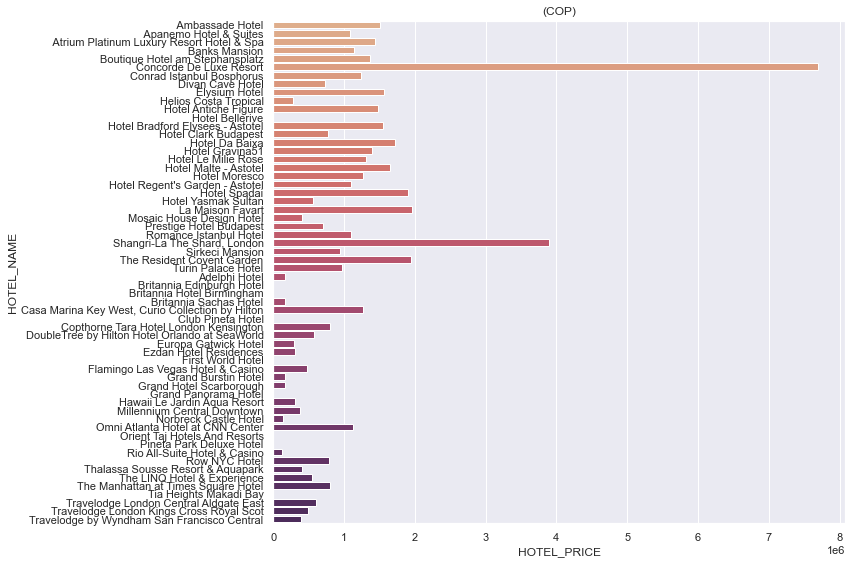

In [25]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="HOTEL_PRICE", y="HOTEL_NAME", data=GENERAL_HOTEL_DATA.sort_values(by=['HOTEL_NAME']), capsize=.2, palette='flare').set(title='('+CURRENCY+')')

plt.tight_layout(h_pad=2)

### HOTELS NUMBER OF REVIEWS

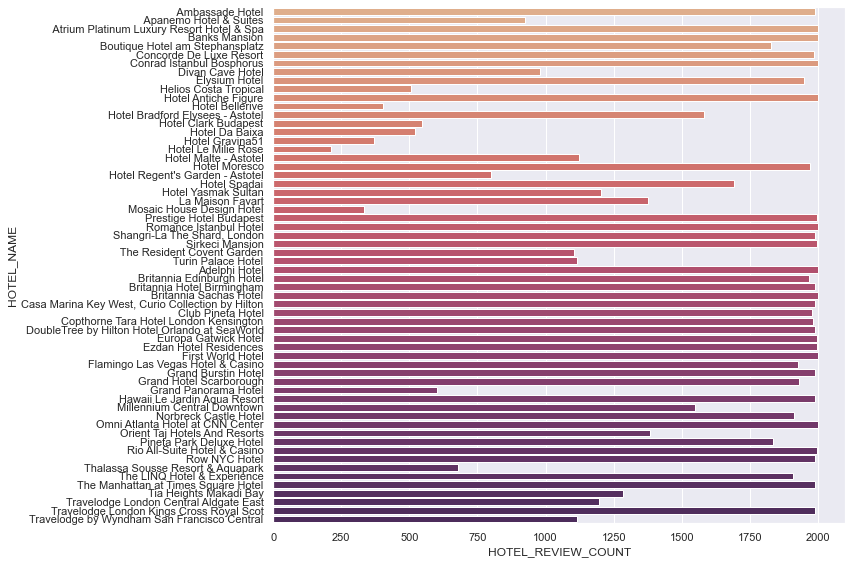

In [26]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="HOTEL_REVIEW_COUNT", y="HOTEL_NAME", data=GENERAL_HOTEL_DATA.sort_values(by=['HOTEL_NAME']), capsize=.2, palette='flare')

plt.tight_layout(h_pad=2)

### REVIEW RATING OVER TIME

In [27]:
def date_to_float(date):
  return date.year+((date.month-1)/12)

# DF - OVERTIME (REVIEW_DATE as FLOAT)
OVERTIME_HOTEL_DATA = HOTEL_DATA.copy()
OVERTIME_HOTEL_DATA['REVIEW_DATE'] = OVERTIME_HOTEL_DATA['REVIEW_DATE'].map(date_to_float)

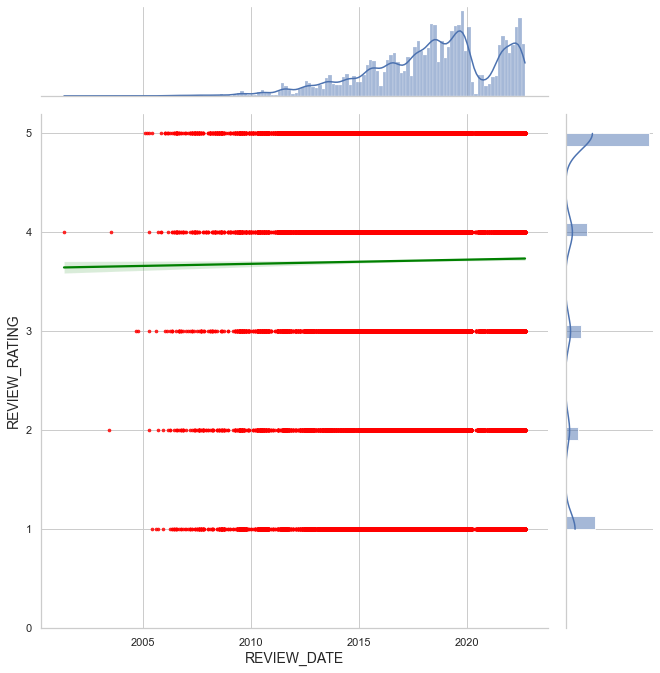

In [28]:
sns.set_theme(style="whitegrid")
plot = sns.jointplot(data = OVERTIME_HOTEL_DATA, x = 'REVIEW_DATE', y = 'REVIEW_RATING', color='b', kind = 'reg', line_kws={'color': 'green'}, scatter_kws={'s': 7, 'color':'red'})

plot.fig.set_size_inches(10,10)

plot.set_axis_labels('REVIEW_DATE', 'REVIEW_RATING', fontsize=14)
plot.ax_marg_y.set_ylim(bottom=0)

plt.show()

### AVERAGE REVIEW RATING BY MONTH

In [29]:
def date_to_month(date):
  return date.month

def month_to_name(month):
  return datetime.date(2022, month, 2).strftime('%B')

# DF - MONTHLY (REVIEW_DATE as FLOAT)
MONTHLY_HOTEL_DATA = HOTEL_DATA.copy()
MONTHLY_HOTEL_DATA['REVIEW_DATE'] = MONTHLY_HOTEL_DATA['REVIEW_DATE'].map(date_to_month)
MONTHLY_HOTEL_DATA = MONTHLY_HOTEL_DATA.sort_values(by = ['REVIEW_DATE'])
MONTHLY_HOTEL_DATA['REVIEW_DATE'] = MONTHLY_HOTEL_DATA['REVIEW_DATE'].map(month_to_name)

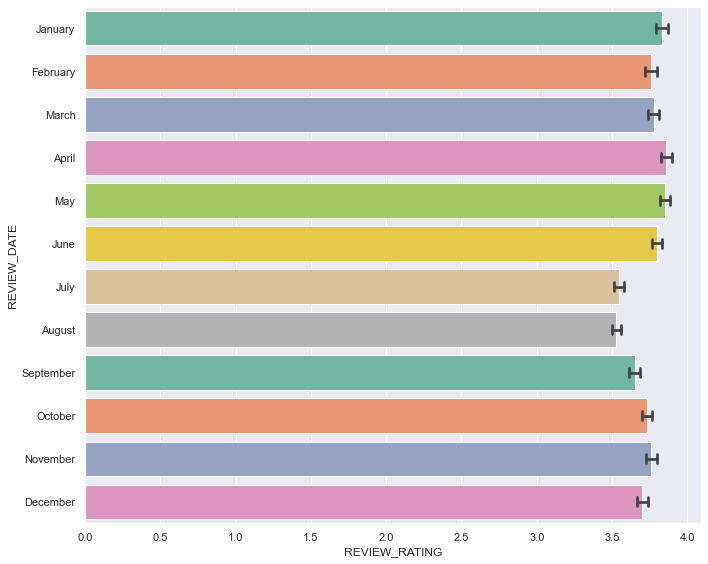

In [30]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x="REVIEW_RATING", y="REVIEW_DATE", data=MONTHLY_HOTEL_DATA, capsize=.2, palette='Set2')

plt.tight_layout(h_pad=2)

### NUMBER OF REVIEWS OVER TIME

In [31]:
# DF - OVERTIME REVIEW COUNT (With columns: REVIEW_DATE as FLOAT, HOTEL_REVIEW_COUNT)
REVIEW_HOTEL_DATA = OVERTIME_HOTEL_DATA.groupby(["REVIEW_DATE"]).size().reset_index(name='HOTEL_REVIEW_COUNT')

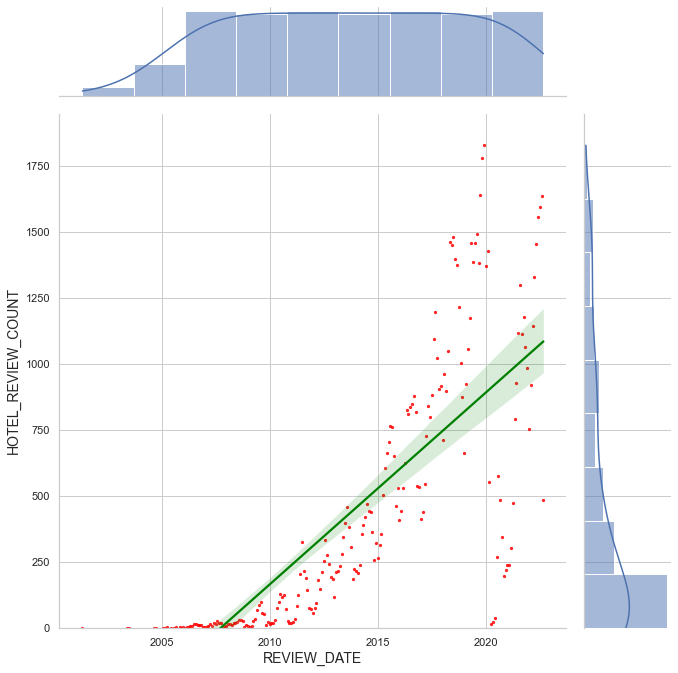

In [32]:
sns.set_theme(style="whitegrid")
plot = sns.jointplot(data = REVIEW_HOTEL_DATA, x = 'REVIEW_DATE', y = 'HOTEL_REVIEW_COUNT', color='b', kind = 'reg', line_kws={'color': 'green'}, scatter_kws={'s': 5, 'color':'red'})

plot.fig.set_size_inches(10,10)

plot.set_axis_labels('REVIEW_DATE', 'HOTEL_REVIEW_COUNT', fontsize=14)
plot.ax_marg_y.set_ylim(bottom=0)

plt.show()

### NUMBER OF REVIEWS BY MONTH

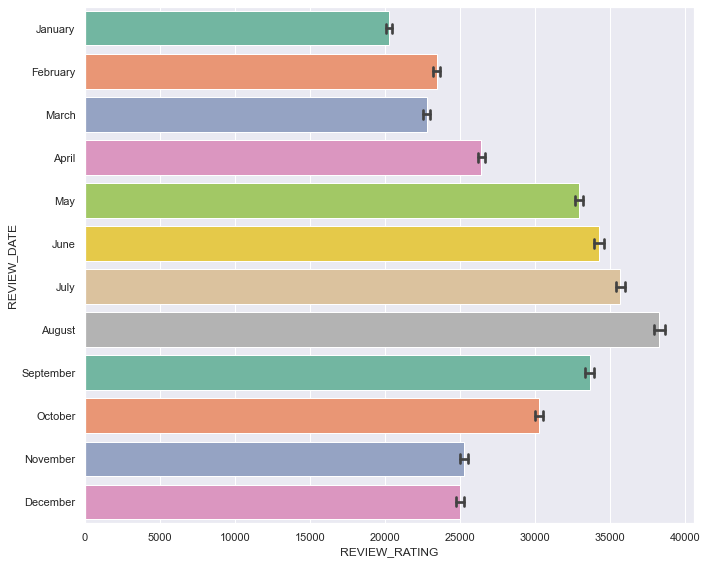

In [33]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(x="REVIEW_RATING", y="REVIEW_DATE", data=MONTHLY_HOTEL_DATA, capsize=.2, estimator=sum, palette='Set2')

plt.tight_layout(h_pad=2)

### HOTELS VARIABLES CORRELATION

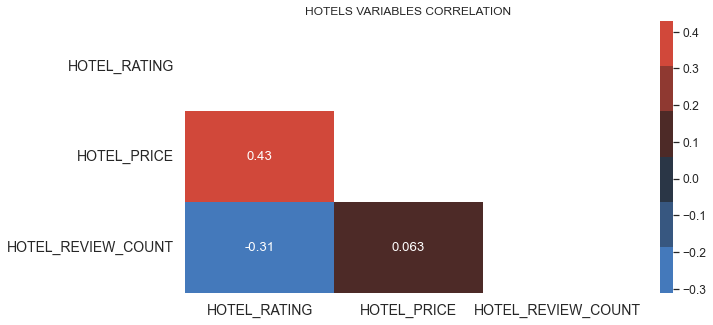

In [34]:
sns.set_theme(style="white")
fig, axs = plt.subplots(figsize = (10,5))
plt.title('HOTELS VARIABLES CORRELATION')
axs.tick_params(axis = 'y', labelsize = 14, pad = 5)
axs.tick_params(axis = 'x', labelsize = 14, pad = 5)
sns.set(font_scale = 1.1)
cmap = sns.diverging_palette(250, 15, center="dark")

corr = GENERAL_HOTEL_DATA.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True)

plt.show()

### HOTEL PRICE DISTRIBUTION BY REVIEW RATING

In [35]:
# DF - RATING AS CATEGORY
RATING_AS_CATEGORY_HOTEL_DATA = HOTEL_DATA.copy()
RATING_AS_CATEGORY_HOTEL_DATA['REVIEW_RATING'] = RATING_AS_CATEGORY_HOTEL_DATA['REVIEW_RATING'].astype("category")

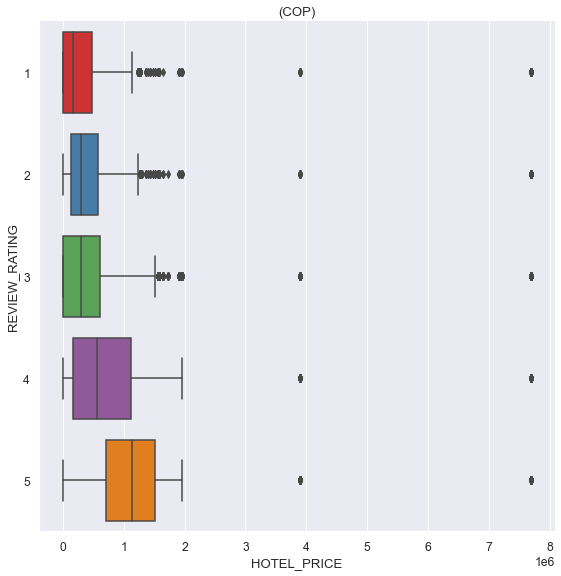

In [36]:
plot = sns.catplot(data=RATING_AS_CATEGORY_HOTEL_DATA, x="HOTEL_PRICE", y="REVIEW_RATING", kind="box", height=8, palette="Set1").set(title='('+CURRENCY+')')

### REVIEW LENGTH DISTRIBUTION BY REVIEW RATING

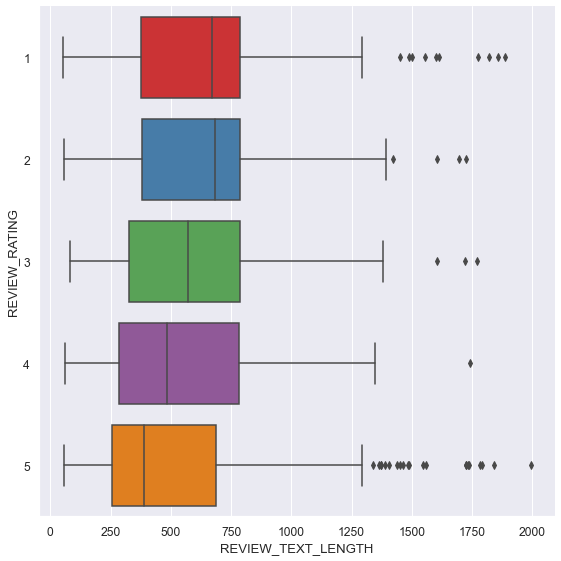

In [37]:
REVIEW_LENGTH_HOTEL_DATA['REVIEW_RATING'] = REVIEW_LENGTH_HOTEL_DATA['REVIEW_RATING'].astype("category")
REVIEW_MAX_LENGTH = 2000

plot = sns.catplot(data=REVIEW_LENGTH_HOTEL_DATA[REVIEW_LENGTH_HOTEL_DATA["REVIEW_TEXT_LENGTH"]< REVIEW_MAX_LENGTH], x="REVIEW_TEXT_LENGTH", y="REVIEW_RATING", kind="box", height=8, palette="Set1")

## Export

### PDF

In [38]:
IPYNB_PATH = "./exploratory_analysis.ipynb"
IPYNB_OUTPUT_FILE_PATH = '../docs/'

# HTML
!jupyter nbconvert $IPYNB_PATH --to html --output-dir $IPYNB_OUTPUT_FILE_PATH

# PDF
!jupyter nbconvert $IPYNB_PATH --to pdf --output-dir $IPYNB_OUTPUT_FILE_PATH

[NbConvertApp] Converting notebook ./exploratory_analysis.ipynb to html
[NbConvertApp] Writing 1199750 bytes to ..\docs\exploratory_analysis.html
[NbConvertApp] Converting notebook ./exploratory_analysis.ipynb to pdf
[NbConvertApp] Support files will be in exploratory_analysis_files\
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Making directory .\exploratory_analysis_files
[NbConvertApp] Writing 120399 bytes to notebook.tex
[NbConvertApp] Building PDF
Traceback (most recent call last):
  File "C:\Users\ariza\anaconda3\Scripts\jupyter-nb

### DATA